# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2381 Ивашинников Леонид Дмитриевич и Двиков Даниил Владиславович. Вариант №7.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Единичный цифровой импульс (аналог функции Дирака):
$$\delta_d(k)=\begin{cases}
1,&k=0,\\
0,&k\ne 0
\end{cases}, k\inℤ$$

Дискретный единичный скачок (аналог функции Хевисайда):
$$\sigma_d(k)=\begin{cases}
1,&k\ge 0,\\
0,&k< 0
\end{cases}, k\inℤ$$

Частота дискретизации $f_d=\frac{1}{T}$.

Дискретная экспоненциальная функция:
$$s_1(k)=\begin{cases}
0,&k\lt 0,\\
a^{k-m},&k\ge 0
\end{cases}, k\inℤ$$

Дискретный комплексный гармонический сигнал:
$$s_2(k)=C\exp(j\hat{\omega}_0k)$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


Nb = 7
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = math.pi / (6 + Nb % 5)
m = 5 + Nb % 5
Nb, N, T, a, C, w0, m, Nb

(7, 32, 0.001, -0.8350000000000001, 3, 0.39269908169872414, 7, 7)

In [2]:
n = np.arange(0, N)
nT = n * T

1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT\in[0,(N-1)T]$ и дискретного нормированного времени $n\in[0,N-1]$. Пояснить:

a. взаимосвязь между дискретным и дискретным нормированным временем;

b. различие между единичным цифровым импульсом и дельта-функцией.

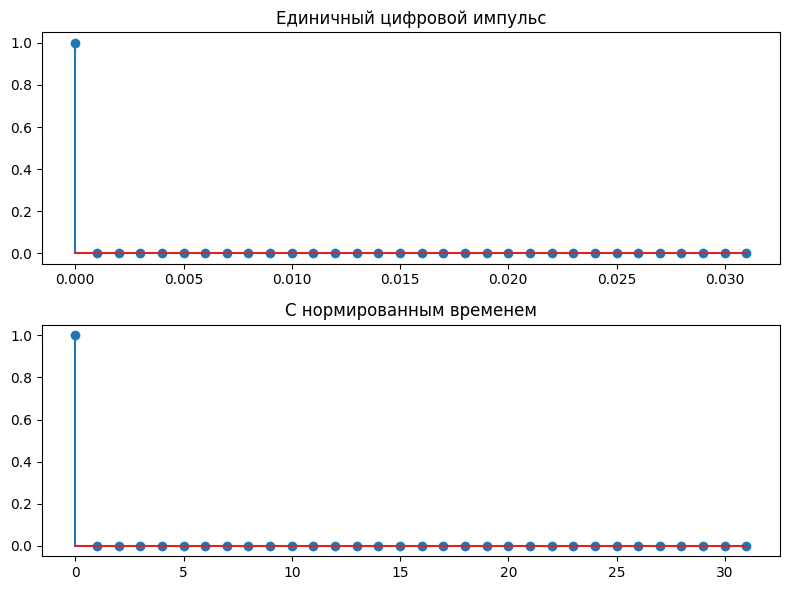

In [5]:
# Единичный цифровой импульс
def delta_d(k: float) -> int:
  return 1 if k == 0 else 0


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.stem(nT, list(map(delta_d, nT)))
ax1.set_title("Единичный цифровой импульс")

ax2.stem(n, list(map(delta_d, n)))
ax2.set_title("С нормированным временем")

plt.tight_layout()


Дискретное время $nT$ и дискретное нормированное время $n$ связаны соотношением $nT=n \cdot T$.
Единичный импульс - это аналог дельта-функции для дискретного случая. Дельта-функция определена на множестве вещенных чисел, а единичный импульс на множестве целых. Единичный импульс равен единице в нулевой точке, а дельта-функция бесконечности.

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT\in[0,(N-1)T]$ и дискретного нормированного времени $n\in[0,N-1]$. Пояснить:

a. соответствие между дискретным и аналоговым единичными скачками;

b. чему равна частота дискретизации дискретного единичного сигнала.

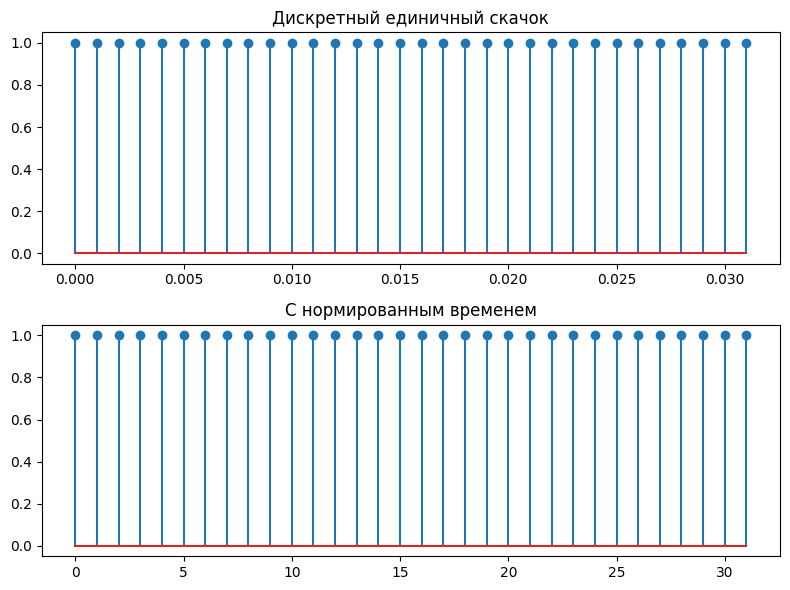

In [6]:
# Дискретный единичный скачок
def sigma_d(k: float) -> int:
  return 1 if k >= 0 else 0


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.stem(nT, list(map(sigma_d, nT)))
ax1.set_title("Дискретный единичный скачок")

ax2.stem(n, list(map(sigma_d, n)))
ax2.set_title("С нормированным временем")

plt.tight_layout()

Дискретный скачок является аналогом функции Хевисайда. Он является результатом дискретизации функции Хевисайда.

Частота дискретизации $f_d=1/T$.

In [7]:
print(f'{1/T} Гц')

1000.0 Гц


3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT\in[0,(N-1)T]$ и дискретного нормированного времени $n\in[0,N-1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.

/tmp/ipython-input-986035634.py:3: RuntimeWarning: invalid value encountered in scalar power
  return 0 if k < 0 else a ** k


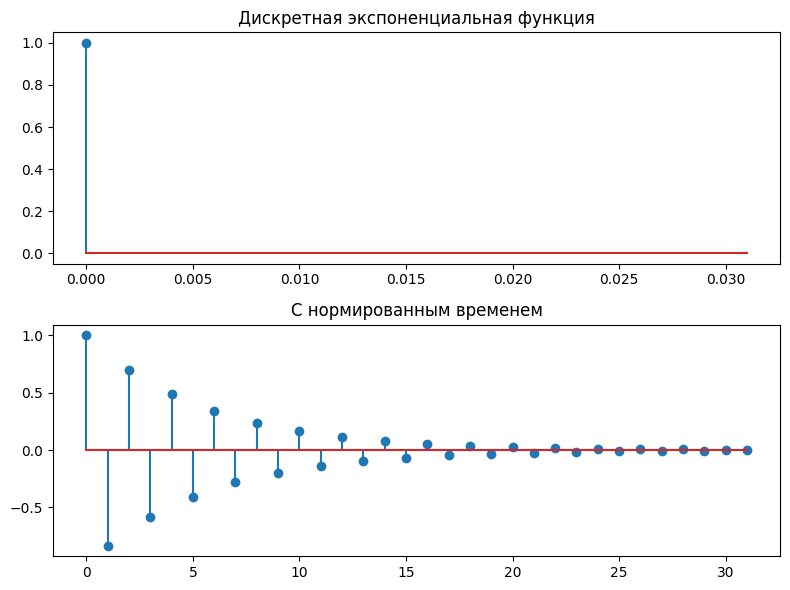

In [9]:
# Дискретная экспоненциальная функция
def s_1(k: int) -> float:
  return 0 if k < 0 else a ** k


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.stem(nT, list(map(s_1, nT)))
ax1.set_title("Дискретная экспоненциальная функция")

ax2.stem(n, list(map(s_1, n)))
ax2.set_title("С нормированным временем")

plt.tight_layout()

Дискретная экспоненциальная функция - результат дискретизации аналоговой. В данном случае нельзя построить график для обычного времени, так как $a<0$, а $0\le k<1$.

4. Смоделировать дискретный комплексный гармонический сигнал $s_2(k)=C\exp(j\hat{\omega}_0k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n\in[0,N-1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

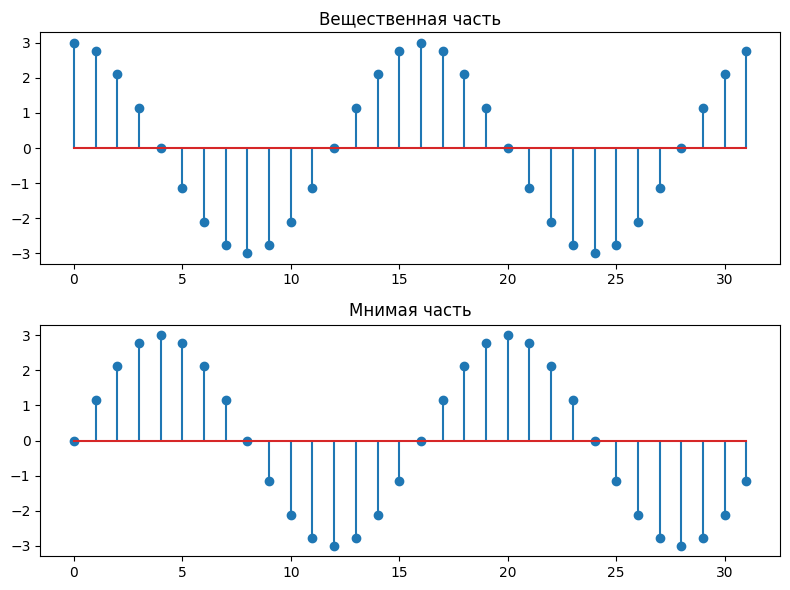

In [10]:
# Дискретный комплексный гармонический сигнал
def s_2(k: int) -> float:
  return C * np.exp(1j*w0*k)

y = list(map(s_2, n))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.stem(n, np.real(y))
ax1.set_title("Вещественная часть")

ax2.stem(n, np.imag(y))
ax2.set_title("Мнимая часть")

plt.tight_layout()

Комплексный гармонический сигнал можно записать в виде комбинации двух вещественных последовательностей:

$$s_2(k)=C\exp(j\hat{\omega}_0k)=C(\cos(\omega_0k)+j\sin(\omega_0k))$$

In [ ]:
print(f'{C} * (cos({w0}*k) + j*sin({w0}*k))')

3 * (cos(0.39269908169872414*k) + j*sin(0.39269908169872414*k))


5. Вывести графики последовательностей $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанных на $m$ отсчётов, на интервале времени $n\in[0,N-1]$. Записать формулы задержанных последовательностей.

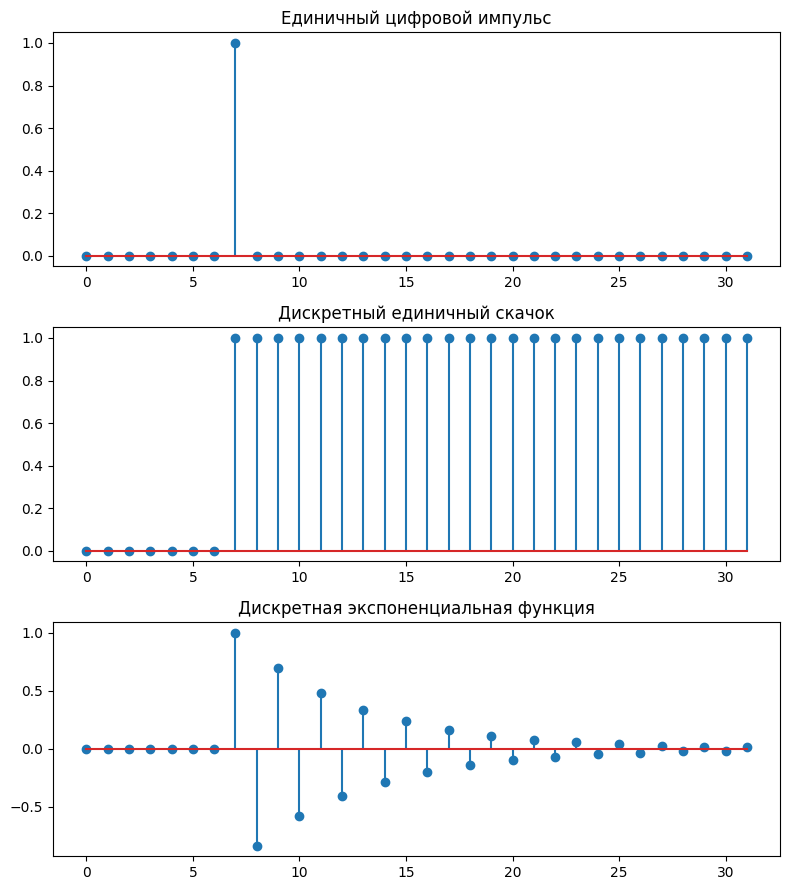

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 9))

ax1.stem(n, list(map(delta_d, n-m)))
ax1.set_title("Единичный цифровой импульс")

ax2.stem(n, list(map(sigma_d, n-m)))
ax2.set_title("Дискретный единичный скачок")

ax3.stem(n, list(map(s_1, n-m)))
ax3.set_title("Дискретная экспоненциальная функция")

plt.tight_layout()

Формула единичного цифрового импульса с задержкой на $m$ отсчётов:
$$\delta_d(k)=\begin{cases}
1,&k=m,\\
0,&k\ne m
\end{cases}, k\inℤ$$

Формула дискретного единичного счачка с задержкой на $m$ отсчётов:
$$\sigma_d(k)=\begin{cases}
1,&k\ge m,\\
0,&k< m
\end{cases}, k\inℤ$$

Формула дискретной экспоненциальной функции с задержкой на $m$ отсчётов:
$$s_1(k)=\begin{cases}
0,&k\lt m,\\
a^{k-m},&k\ge m
\end{cases}, k\inℤ$$

## Выводы

Были изучены и смоделированы основные стандартные дискретные сигналы такие как единичный цифровой импульс, дискретный единичный скачок, дискретная экспонента, комплексный гармонический сигнал. Была установлена связь между аналоговыми и цифровыми сигналами. Для каждого сигнала был построен график для обычного и нормированного времени.